In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import chi2


In [175]:
df=pd.read_csv('Churn.csv')

FileNotFoundError: [Errno 2] File b'Churn.csv' does not exist: b'Churn.csv'

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [13]:
df.groupby('cluster').Churn.mean()

cluster
0    0.113744
1    0.176900
Name: Churn, dtype: float64

In [14]:
pd.crosstab(df.cluster,df.Churn)

Churn,False,True
cluster,,
0,1496,192
1,1354,291


In [19]:
pd.crosstab(df.cluster,df.Churn,normalize='index')

Churn,False,True
cluster,,
0,0.886256,0.113744
1,0.823100,0.176900


In [20]:
def churn_rate(x):
    return x.sum()/x.shape[0]

In [22]:
df['Total Charge']=df['Total intl charge']+df['Total night charge']+df['Total eve charge']+df['Total day charge']

In [25]:
df_stats1=df[['Total Charge','Churn','cluster']].groupby('cluster').agg({'Churn':churn_rate, 'Total Charge':[len,'mean','std']})

In [26]:
df_stats1.columns=df_stats1.columns.droplevel(0)

In [30]:
df_stats1.rename({'len':'number of observations','mean':'average spendings','std':'std spendings'},axis=1,inplace=True)

In [32]:
df_stats1.round(2)

,churn_rate,number of observations,average spendings,std spendings
cluster,,,,
0,0.11,1688.0,52.28,7.64
1,0.18,1645.0,66.81,7.52


In [40]:
df_stats1['average spendings'].diff()[1]

14.534966154799164

In [41]:
df_stats1[['std spendings','number of observations']]

,std spendings,number of observations
cluster,,
0,7.643959,1688.0
1,7.518515,1645.0


In [44]:
def z_prep(x):
    return (x['std spendings']**2)/x['number of observations']

In [49]:
Z=df_stats1['average spendings'].diff()[1]/df_stats1[['std spendings','number of observations']].apply(lambda x:z_prep(x),axis=1).sum()**0.5

In [51]:
pvalue=norm.sf(Z)

In [52]:
print(f'Z-score: {Z}\np-value: {pvalue}')

Z-score: 55.34226808136037
p-value: 0.0


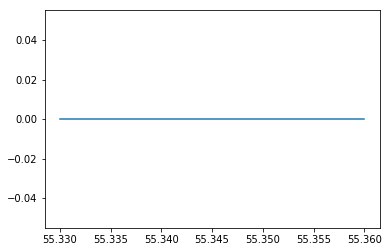

In [61]:
z = np.arange(55.33, 55.36, 0.01)
plt.plot(z, norm.pdf(z))
plt.fill_between(z[z>Z], norm.pdf(z[z>Z]))
plt.show()

In [78]:
df_stats2=df[['Churn','cluster']].groupby('cluster').agg([len,'sum',lambda x:x.shape[0]-x.sum()])
df_stats2.columns=df_stats2.columns.droplevel(0)
df_stats2.rename({'len':'num_of_observations','sum':'quit','<lambda>':'stayed'},axis=1,inplace=True)

In [79]:
df_stats2

,num_of_observations,quit,stayed
cluster,,,
0,1688,192.0,1496
1,1645,291.0,1354


In [82]:
churn_rate=df_stats2.quit.sum()/df_stats2.num_of_observations.sum()

In [83]:
churn_rate

0.14491449144914492

In [84]:
df_stats3=df_stats2.copy()

In [85]:
df_stats3.quit=(df_stats2.num_of_observations*churn_rate).round()

In [86]:
df_stats3.stayed=(df_stats2.num_of_observations*(1-churn_rate)).round()

In [87]:
df_stats3

,num_of_observations,quit,stayed
cluster,,,
0,1688,245.0,1443.0
1,1645,238.0,1407.0


In [88]:
T=df_stats3.iloc[:,1:].values
T

array([[ 245., 1443.],
       [ 238., 1407.]])

In [89]:
O=df_stats2.iloc[:,1:].values
O

array([[ 192., 1496.],
       [ 291., 1354.]])

In [90]:
D=np.sum(np.square(T-O)/T)
D

27.210912417221206

In [91]:
pvalue=chi2.sf(D,df=1)

In [92]:
pvalue

1.8242611797854696e-07

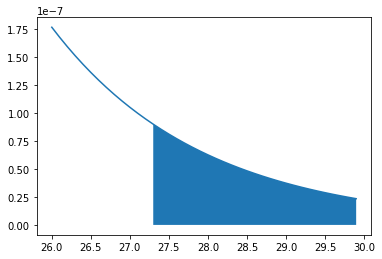

In [95]:
d = np.arange(26, 30, 0.1)
plt.plot(d, chi2.pdf(d, df=1))
plt.fill_between(d[d>D], chi2.pdf(d[d>D], df=1))
plt.show()

In [105]:
os.chdir('../../../../GitHub/My own labs/mlcourse.ai')

In [107]:
df=pd.read_csv('./data/video_games_sales.csv')

In [103]:
import os
os.getcwd()

'C:\\Users\\eldiy\\Documents\\Ironhack\\October\\Curriculum\\Probability'

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [109]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df.Platform.value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

# TASK

1. Detect what makes the difference between PS3 and X360 platforms
2. Calculate the average critic score for these platforms and test the significance of the difference
3. Calculate the confidence interval for the average sales in Europe for top 5 platforms (separately)

In [114]:
df_selected=df[df.Platform.apply(lambda x: x in ['PS3','X360'])]

In [117]:
df_selected.groupby('Platform').mean()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Platform,,,,,,,,,
PS3,2010.840735,0.295635,0.248152,0.060248,0.101938,0.705808,70.382927,33.901220,205.891676
X360,2009.880682,0.477393,0.214548,0.009849,0.067956,0.769913,68.616812,42.121179,187.156315


1. EU Sales
2. Global Sales - Sorry, too biased
3. Other Sales
4. Critic Score

In [118]:
import seaborn as sns

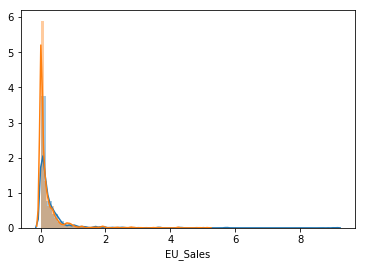

In [128]:
sns.distplot(df_selected.loc[df_selected.Platform=='PS3','EU_Sales'], hist=True)
sns.distplot(df_selected.loc[df_selected.Platform=='X360','EU_Sales'], hist=True)
sns.figsize=(12,12)


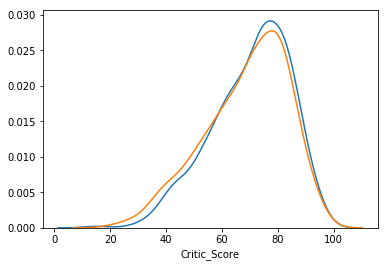

In [135]:
sns.distplot(df_selected.loc[df_selected.Platform=='PS3','Critic_Score'], hist=False)
sns.distplot(df_selected.loc[df_selected.Platform=='X360','Critic_Score'], hist=False)

In [136]:
df_selected.dropna(inplace=True)

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
df_selected.groupby('Platform').Critic_Score.mean()

Platform
PS3     70.953186
X360    69.041958
Name: Critic_Score, dtype: float64

In [138]:
from scipy.stats import ttest_ind

In [142]:
ttest_ind(df_selected.loc[df_selected.Platform=='X360','Critic_Score'],
          df_selected.loc[df_selected.Platform=='PS3','Critic_Score'],
         equal_var=False)

Ttest_indResult(statistic=-2.6455357279881393, pvalue=0.00823489111858733)

## The T-test of 2 independent samples showed us that there is significant difference between critic score for PS3 and X360.

In [159]:
df_stat=df_selected.groupby('Platform').Critic_Score.agg(['mean','std',len])
df_stat

,mean,std,len
Platform,,,
PS3,70.953186,13.997038,769.0
X360,69.041958,15.139664,858.0


In [160]:
df_stat.rename({'mean':'average','std':'stand','len':'num'},axis=1,inplace=True)

In [161]:
abs(df_stat.average.diff()[1])

1.9112279138286965

In [166]:
def z_prep(x):
    return (x['stand']**2)/x['num']

In [171]:
Z=abs(df_stat.average.diff()[1])/(df_stat.iloc[:,1:].apply(lambda x:z_prep(x),axis=1).sum())**0.5
Z

2.6455357279881353

In [173]:
pvalue=norm.sf(Z)
pvalue

0.004078083669672786

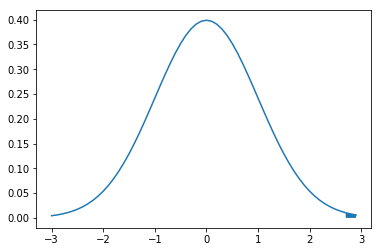

In [174]:
z = np.arange(-3, 3, 0.1)
plt.plot(z, norm.pdf(z))
plt.fill_between(z[z>Z], norm.pdf(z[z>Z]))
plt.show()

3. Calculate the confidence interval for the average sales in Europe for top 5 platforms (separately)


In [183]:
df.Platform.value_counts().head().index

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360'], dtype='object')

In [220]:
list_of_platforms=df[df.EU_Sales!=0].groupby('Platform').EU_Sales.sum().sort_values().tail(5).index.tolist()
list_of_platforms

['PS', 'Wii', 'X360', 'PS3', 'PS2']

In [198]:
df[df.Platform.apply(lambda x: x in list_of_platforms)][['Platform','EU_Sales']]

,Platform,EU_Sales
0,Wii,28.96
2,Wii,12.76
3,Wii,10.93
7,Wii,9.18
8,Wii,6.94
13,Wii,8.03
14,X360,4.89
15,Wii,8.49
16,PS3,9.09
17,PS2,0.40


In [199]:
df.loc[df.Platform.apply(lambda x: x in list_of_platforms),['Platform','EU_Sales']]

,Platform,EU_Sales
0,Wii,28.96
2,Wii,12.76
3,Wii,10.93
7,Wii,9.18
8,Wii,6.94
13,Wii,8.03
14,X360,4.89
15,Wii,8.49
16,PS3,9.09
17,PS2,0.40


In [221]:
df_stats=df.loc[(df.EU_Sales!=0)&(df.Platform.apply(lambda x: x in list_of_platforms)),['Platform','EU_Sales']].groupby('Platform').agg(['mean','std',len])

In [222]:
df_stats.columns=df_stats.columns.droplevel(0)
df_stats.rename({'mean':'avg','std':'stdn','len':'num'},axis=1,inplace=True)

In [223]:
df_stats

,avg,stdn,num
Platform,,,
PS,0.217304,0.398320,983.0
PS2,0.207517,0.402931,1635.0
PS3,0.343694,0.669177,961.0
Wii,0.358210,1.424301,732.0
X360,0.273495,0.521829,990.0


In [224]:
from scipy.stats import t

In [228]:
df_stats['conf_int']=df_stats.apply(lambda x: t.interval(0.95,x.num-1,loc=x.avg,scale=x.stdn/x.num),axis=1)

In [236]:
df_stats['lbound']=df_stats.conf_int.apply(lambda x:x[0])
df_stats['ubound']=df_stats.conf_int.apply(lambda x:x[1])

In [239]:
df_stats.sort_values(by='ubound',ascending=False)

,avg,stdn,num,conf_int,lbound,ubound
Platform,,,,,,
Wii,0.358210,1.424301,732.0,"(0.35439042545047134, 0.36203033957684666)",0.354390,0.362030
PS3,0.343694,0.669177,961.0,"(0.3423275567749274, 0.34506058058198713)",0.342328,0.345061
X360,0.273495,0.521829,990.0,"(0.27246058708000276, 0.2745293119098897)",0.272461,0.274529
PS,0.217304,0.398320,983.0,"(0.2165089966980848, 0.21809934511269982)",0.216509,0.218099
PS2,0.207517,0.402931,1635.0,"(0.20703344601043333, 0.20800019313329232)",0.207033,0.208000
